<a href="https://colab.research.google.com/github/anioki/ML_training_projects/blob/main/avocado/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download data

In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-19 20:05:51           7889  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4800  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1621  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2262  
math

In [4]:
! kaggle datasets download -d neuromusic/avocado-prices

avocado-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! mkdir data
! unzip avocado-prices.zip -d data

mkdir: cannot create directory ‘data’: File exists
Archive:  avocado-prices.zip
replace data/avocado.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('/content/data/avocado.csv', encoding="ISO-8859-1")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#Data Observation and Preprocessing

In [70]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [71]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [72]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [73]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]  = pd.Categorical(content).codes+1
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,52,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,1
1,51,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,1
2,50,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,1
3,49,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,1
4,48,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,162,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2,2018,54
18245,161,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2,2018,54
18246,160,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2,2018,54
18247,159,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2,2018,54


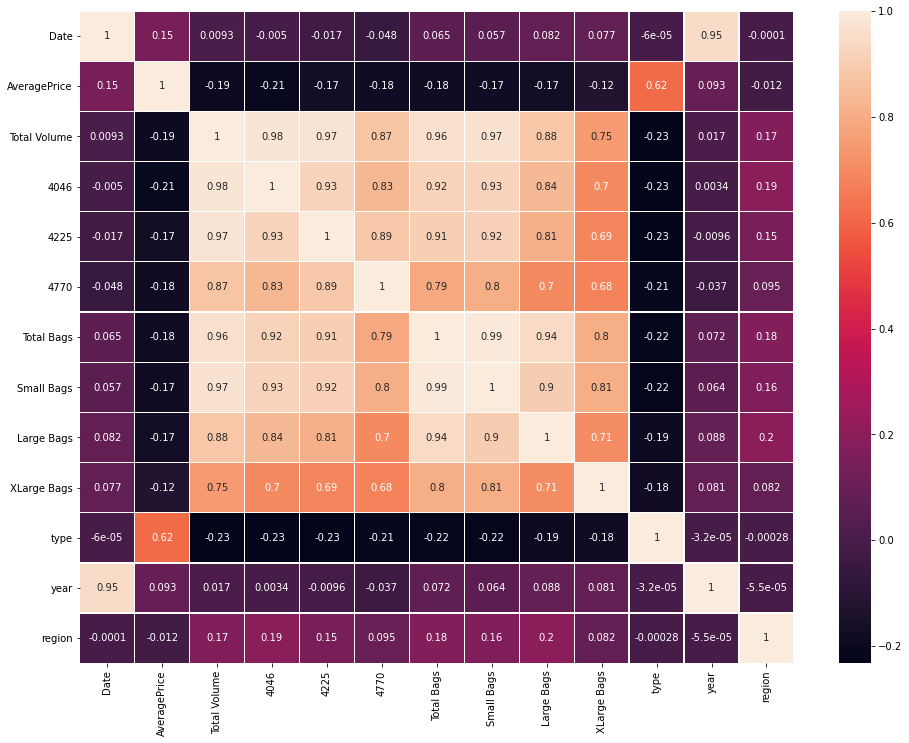

In [74]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True,linewidths=0.25,vmax=1.0,)
plt.show()

#Predict Region and Compare Results

In [75]:
X = df.drop('region', axis=1)
y = df['region']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((14599, 12), (3650, 12))

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
KNN = KNeighborsClassifier()
parameters = {'n_neighbors':range(1, 10)}
clf = GridSearchCV(KNN, parameters)
clf.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024916,0.001232,0.100335,0.004668,1,{'n_neighbors': 1},0.664041,0.665068,0.666438,0.667123,0.652278,0.662990,0.005462,1
1,0.024176,0.000951,0.105948,0.004010,2,{'n_neighbors': 2},0.629795,0.631164,0.636301,0.633562,0.629668,0.632098,0.002526,9
2,0.024950,0.000952,0.112106,0.006249,3,{'n_neighbors': 3},0.649315,0.652055,0.655137,0.652397,0.648167,0.651414,0.002457,3
3,0.024354,0.000927,0.117683,0.007135,4,{'n_neighbors': 4},0.652740,0.646918,0.658562,0.653767,0.646797,0.651757,0.004457,2
4,0.024579,0.002191,0.114043,0.004125,5,{'n_neighbors': 5},0.646233,0.651712,0.646918,0.653767,0.640288,0.647784,0.004703,4
5,0.023460,0.000276,0.117212,0.004880,6,{'n_neighbors': 6},0.647945,0.641781,0.640753,0.646233,0.631038,0.641550,0.005899,6
6,0.023659,0.000741,0.129442,0.017727,7,{'n_neighbors': 7},0.643493,0.643836,0.641438,0.647945,0.631723,0.641687,0.005411,5
7,0.024042,0.000465,0.128668,0.013638,8,{'n_neighbors': 8},0.642123,0.636644,0.640753,0.643836,0.633779,0.639427,0.003691,7
8,0.023697,0.000272,0.121326,0.003487,9,{'n_neighbors': 9},0.638014,0.629452,0.639384,0.636986,0.632066,0.635180,0.003781,8


In [79]:
DTR = DecisionTreeRegressor()
parameters = {'criterion':['mse', 'friedman_mse', 'mae']}
clf = GridSearchCV(DTR, parameters)
clf.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154883,0.005071,0.002933,0.000543,mse,{'criterion': 'mse'},0.495746,0.544317,0.542290,0.580980,0.524302,0.537527,0.027848,1
1,0.152833,0.006909,0.002541,0.000098,friedman_mse,{'criterion': 'friedman_mse'},0.485509,0.544625,0.529648,0.552269,0.515619,0.525534,0.023649,2
2,13.710741,0.156420,0.002645,0.000050,mae,{'criterion': 'mae'},0.454488,0.519352,0.493328,0.493823,0.538425,0.499883,0.028301,3


In [80]:
DTC = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best','random']}
clf = GridSearchCV(DTC, parameters)
clf.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.347940,0.010228,0.003310,0.000169,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.794521,0.797603,0.790753,0.792466,0.792052,0.793479,0.002391,2
1,0.033799,0.000951,0.003280,0.000096,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.752397,0.766096,0.782534,0.778425,0.773210,0.770532,0.010603,3
2,1.143639,0.031609,0.003155,0.000333,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.809589,0.802397,0.801712,0.811644,0.801987,0.805466,0.004261,1
3,0.039258,0.002107,0.003311,0.000394,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.748288,0.761301,0.763699,0.782534,0.756766,0.762518,0.011306,4


#Predict AveragePrice and Compare Results

In [81]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR.score(X_test, y_test)

0.9120269163640348

In [83]:
DTR = DecisionTreeRegressor()
parameters = {'criterion':['mse', 'friedman_mse', 'mae']}
clf = GridSearchCV(DTR, parameters)
clf.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.286072,0.043876,0.003318,0.000125,mse,{'criterion': 'mse'},-1.087699,-1.065306,-0.982670,-1.046740,-1.093465,-1.055176,0.039887,2
1,0.282261,0.038870,0.003246,0.000133,friedman_mse,{'criterion': 'friedman_mse'},-1.078690,-1.056817,-1.000364,-1.039507,-1.124165,-1.059908,0.041117,3
2,20.815081,7.725119,0.003272,0.000083,mae,{'criterion': 'mae'},-1.040357,-1.013010,-1.027019,-1.001299,-1.147832,-1.045903,0.052628,1
